In [1]:
import numpy as np
import pandas as pd
file_path = r"C:\Users\shara\OneDrive\Desktop\ML ACTS\projects ml\Linear Regression\mental_health dataset.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print(df.describe())

print("\n\nMissing values\n", df.isnull().sum())

   Time_Period      Value
0     1.000000  13.990142
1     1.033011  12.167735
2     1.066022  14.608121
3     1.099033  17.316672
4     1.132044        NaN
      Time_Period       Value
2995    99.867956  259.902332
2996    99.900967         NaN
2997    99.933978         NaN
2998    99.966989  260.920002
2999   100.000000  259.534223
       Time_Period        Value
count  3000.000000  2877.000000
mean     50.500000   136.065757
std      28.593132    72.006705
min       1.000000   -34.188471
25%      25.750000    73.540244
50%      50.500000   135.651728
75%      75.250000   198.108701
max     100.000000   310.301799


Missing values
 Time_Period      0
Value          123
dtype: int64


In [2]:
print(df.columns)

Index(['Time_Period', 'Value'], dtype='object')


In [3]:
# Remove missing values
df_clean = df.dropna()
df_clean = df_clean.reset_index(drop=True)
print(df_clean.isnull().sum())
print(len(df), len(df_clean))  
print(df_clean.shape)
print("\n\n\n")
print(df_clean.head())
print("\n\nMissing values\n", df_clean.isnull().sum())

Time_Period    0
Value          0
dtype: int64
3000 2877
(2877, 2)




   Time_Period      Value
0     1.000000  13.990142
1     1.033011  12.167735
2     1.066022  14.608121
3     1.099033  17.316672
4     1.165055  12.210227


Missing values
 Time_Period    0
Value          0
dtype: int64


In [4]:
#shuffle dataeset to avoid pattern in data 
# Shuffle and split data
df_shuffled = df_clean.sample(frac=1).reset_index(drop=True)
train = df_shuffled.iloc[:1000]
test = df_shuffled.iloc[1000:2000]
print(train.describe())
print(test.describe())


       Time_Period        Value
count  1000.000000  1000.000000
mean     49.844368   134.577880
std      29.181662    73.399438
min       1.198066     7.833017
25%      24.701901    70.979255
50%      49.080527   132.551472
75%      75.885462   199.371927
max     100.000000   310.301799
       Time_Period        Value
count  1000.000000  1000.000000
mean     51.845925   139.468042
std      28.204253    71.269664
min       1.033011   -18.593921
25%      27.392297    78.391861
50%      53.157386   143.331790
75%      76.372374   200.781356
max      99.834945   305.336996


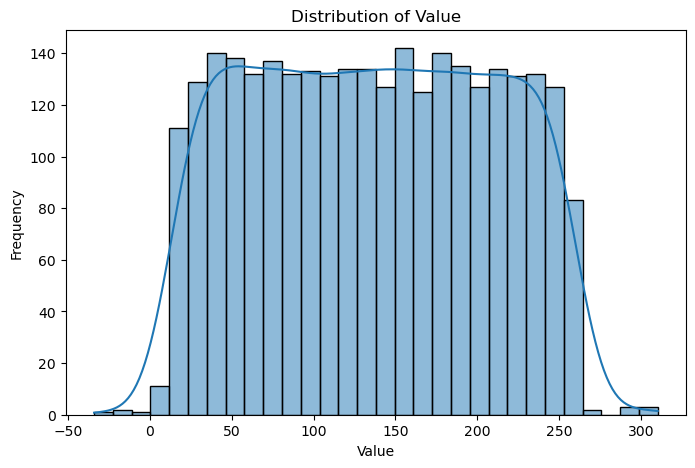

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_shuffled['Value'], bins=30, kde=True)#Kernel Density Estimation creastes a smooth histogram rather than step like graph   
#number of intervals (bins) into which data is grouped in a histogram
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#outcome long tail suggest possible outliers    2 peaks suggest 2 common values


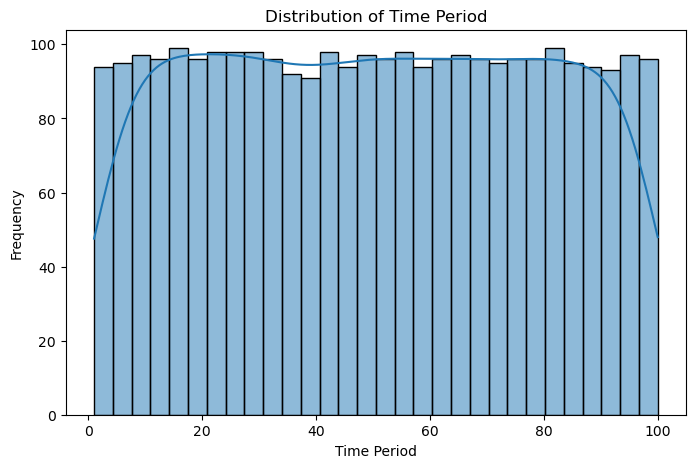

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df_shuffled['Time_Period'], bins=30, kde=True) #bins=30 means your data is split into 30 intervals equally spaced along x axis if bin =5 means 5 dabbe
plt.title('Distribution of Time Period')
plt.xlabel('Time Period')
plt.ylabel('Frequency')
plt.show()
# outcome 3 peaks suggest 3 common time periods

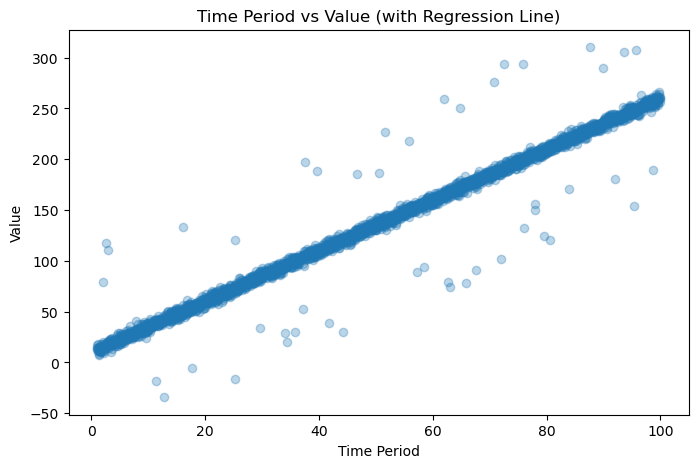

In [7]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Time_Period',y='Value', data=df_shuffled, scatter_kws={'alpha':0.3}) #scatter_kws=alpha for opacity kws means keyword argumants(kwagrs)
plt.title('Time Period vs Value (with Regression Line)')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.show()
#outcome The regression line is nearly straight, indicating that
# "Time Period" predict or explain the changes in "Value".


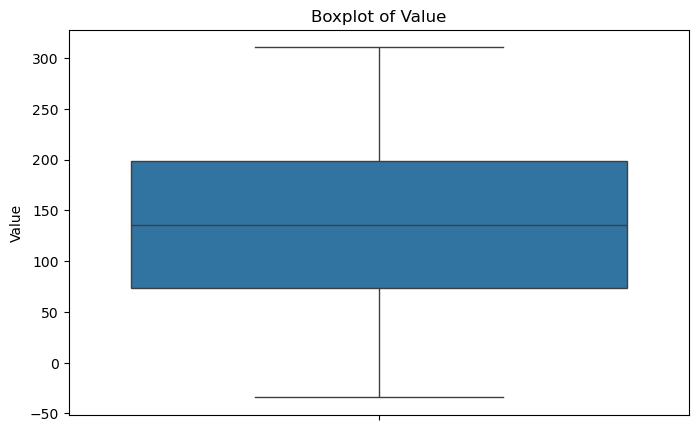

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='Value', data=df_shuffled)#boxplots help you quickly see the center, spread, and extreme points (outliers) in your data.
plt.title('Boxplot of Value')
plt.ylabel('Value')
plt.show()
#Box: Shows center and spread for most data (middle 50%)
#Whiskers: Show typical minimum and maximum values
#Dots above whisker: Show outliers, representing extreme data points beyond usual limits. not here

#box mental value=value
#Lower edge: 25% of data is below this value.
#Upper edge: 75% of data is below this value.
#Line inside box: Median  the middle value of your data.

In [9]:
X_train = train[['Time_Period']].values.astype(float) # double brackets to keep 2d shape 
y_train = train['Value'].values.astype(float)
X_test = test[['Time_Period']].values.astype(float)
y_test = test['Value'].values.astype(float)
# Extract features and convert to numpy arrays 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1000, 1) (1000,) (1000, 1) (1000,)


In [10]:
# Model definition with loss tracking
class SimpleLinearRegression:
    def __init__(self):
        self.w = 0.0  # Weight
        self.b = 0.0  # Bias
        self.losses = []  # To track loss during training
    
    def fit(self, X, y, iterations=1000, learning_rate=0.01):
        n = len(y)  # Number of samples
        X_flat = X.flatten()  # Flatten X to 1D for simpler calculations
        for i in range(iterations):  # Iterate over epochs
            y_pred = self.w * X_flat + self.b  # Prediction
            error = y_pred - y  # Difference between predicted and actual values
            loss = np.mean(error ** 2)  # Mean squared error loss
            self.losses.append(loss)  # Record loss for this iteration
            # Gradient descent updates
            self.w -= (learning_rate * 2 / n) * np.sum(X_flat * error)
            self.b -= (learning_rate * 2 / n) * np.sum(error)
    
    def predict(self, X):
        return self.w * X.flatten() + self.b  # Generate predictions
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)  # Mean squared error
    
    def rmse(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))  # Root mean squared error
    
    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
        return 1 - (ss_res / ss_tot)  # R² score

In [11]:
# Train the model
model = SimpleLinearRegression()
model.fit(X_train, y_train, iterations=1000, learning_rate=0.01)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\shara\AppData\Local\Temp\ipykernel_3360\2172997489.py:14: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)  # Mean squared error loss
c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\shara\AppData\Local\Temp\ipykernel_3360\2172997489.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  self.w -= (learning_rate * 2 / n) * np.sum(X_flat * error)


In [12]:
#Evaluate 
y_pred = model.predict(X_test)
print(f"MSE: {model.mse(y_test, y_pred):.6f}")
print(f"RMSE: {model.rmse(y_test, y_pred):.6f}")
print(f"R² Score: {model.r2_score(y_test, y_pred):.6f}")
print(f"Accuracy: {model.r2_score(y_test, y_pred)*100:.2f}%")

MSE: nan
RMSE: nan
R² Score: nan
Accuracy: nan%


In [13]:
print(np.corrcoef(X_train.flatten(), y_train))
#output correlation is 0 << 0.99 therefore feature and label are highly related

[[1.         0.99286571]
 [0.99286571 1.        ]]


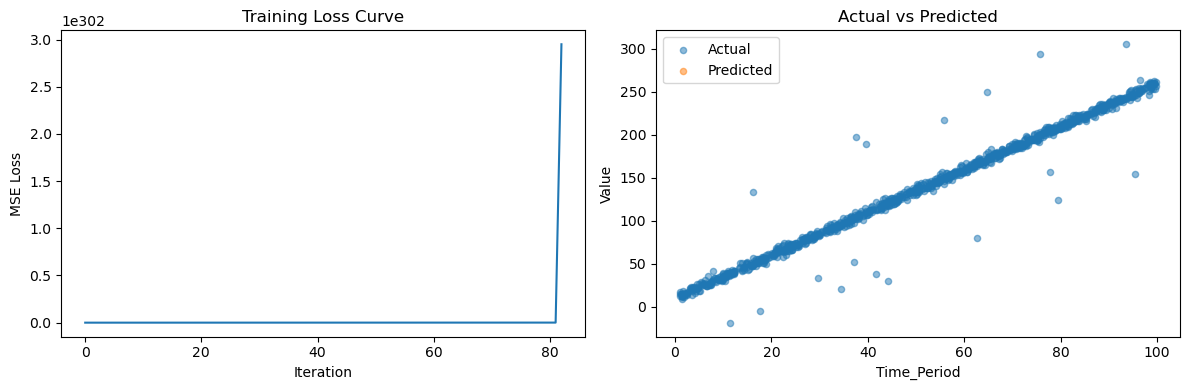

In [14]:
#visualizations

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Actual', s=20)
plt.scatter(X_test, y_pred, alpha=0.5, label='Predicted', s=20)
plt.xlabel('Time_Period')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()


In [15]:
print(f" Equation: y = {model.w:.4f} * x + {model.b:.4f}")


#streamlit and flask donot run with ipynb notebook


 Equation: y = nan * x + nan
